Name Surname: Akbar Bunyadzade

Student No: 912400214

---

Libraries to be used

---



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Build your own code-base (30 points)

Implement the methods provided and compare your implementation with Sklearn library

---

K-Nearest Neighbour (5 points)

In [2]:
class KNN:
  def __init__(self, train_data, train_label, k=3):
    self.k = k
    self.train_data = train_data
    self.train_label = train_label

  def predict(self, test_data):
    # implement here
    predictions = []
    for test_point in test_data:
      distances = np.linalg.norm(self.train_data - test_point, axis = 1)
      k_indices = np.argsort(distances)[:self.k]
      k_labels = self.train_label[k_indices]
      predicted_label = np.argmax(np.bincount(k_labels))
      predictions.append(predicted_label)
    return np.array(predictions)

Gaussian Naive Bayes (5 points)

In [3]:
class GNB:
    def __init__(self, train_data, train_label):
      # implement here
        self.train_data = np.array(train_data)
        self.train_label = np.array(train_label)
        self.classes = np.unique(self.train_label)
        self.means = {}
        self.variances = {}
        self.priors = {}

    def gaussian_probability(self, x, mean, variance):
        #handling zero variance even if it happens with a very slight chance
        variance = np.where(variance == 0, 1e-6, variance)
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def fit(self):
        for c in self.classes:
            class_data = self.train_data[self.train_label == c]
            self.means[c] = np.mean(class_data, axis=0)
            self.variances[c] = np.var(class_data, axis=0)
            self.variances[c][self.variances[c] == 0] = 1e-6
            #calculating prior probability for the class
            self.priors[c] = class_data.shape[0] / self.train_data.shape[0]

    def predict(self, test_data):
        test_data = np.array(test_data)
        predictions = []

        for x in test_data:
            class_probabilities = {}
            for c in self.classes:
                #starting with the log prior probability for the class
                class_prob = np.log(self.priors[c])

                #summing the log of Gaussian probabilities of each feature
                mean = self.means[c]
                variance = self.variances[c]
                variance = np.where(variance == 0, 1e-6, variance)
                #log proba calculation
                log_prob = -0.5 * np.sum(np.log(2 * np.pi * variance))
                log_prob -= 0.5 * np.sum(((x - mean) ** 2) / variance)
                class_prob += log_prob

                class_probabilities[c] = class_prob

            #choosing the class with the highest probability
            predictions.append(max(class_probabilities, key=class_probabilities.get))

        return np.array(predictions)


Principal Component Analysis (5 points)

In [4]:
class PCA:
    def __init__(self, data, n_components):
        self.data = data
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self):
        #centering the data by subtracting the mean
        self.mean = np.mean(self.data, axis=0)
        data_centered = self.data - self.mean

        #calculating covariance matrix making each col represent a variable (feature) and each row as sample
        cov_matrix = np.cov(data_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        #sorting eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        #selecting the top n_components
        self.components = eigenvectors[:, :self.n_components]

        #calculating explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components] / total_variance

    def transform(self, x):
        x_centered = np.array(x) - self.mean
        return np.dot(x_centered, self.components)


Metrics (2+3 points)



In [5]:
def rmse(y_true, y_pred):
  # implement here
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

def accuracyNf1_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)

    classes = np.unique(y_true)
    #generalizing the case when there are more than 2 classes
    f1_scores = []

    #calculating F1 Score for each class
    for cls in classes:
        true_positives = np.sum((y_true == cls) & (y_pred == cls))
        false_positives = np.sum((y_true != cls) & (y_pred == cls))
        false_negatives = np.sum((y_true == cls) & (y_pred != cls))

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        if precision + recall > 0:
            f1_score = 2 * (precision * recall) / (precision + recall)
        else:
            f1_score = 0
        f1_scores.append(f1_score)

    avg_f1_score = np.mean(f1_scores)

    return accuracy, avg_f1_score

Visualization Tools (5 points)

This part here came a little bit unclear for me as exactly I could not figure which types of visualizations are exactly needed. Which is why I will add several scripts here for clarification:

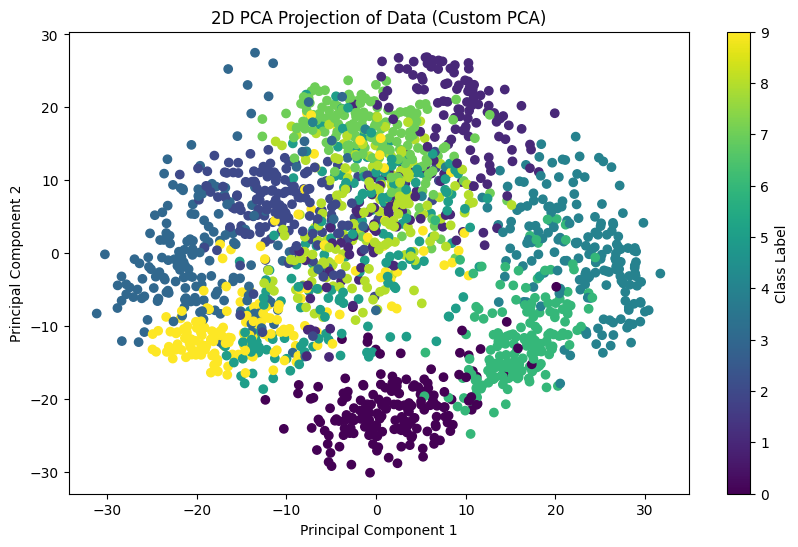

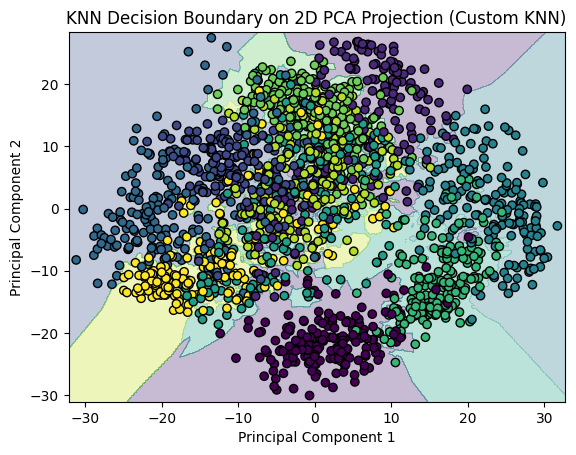

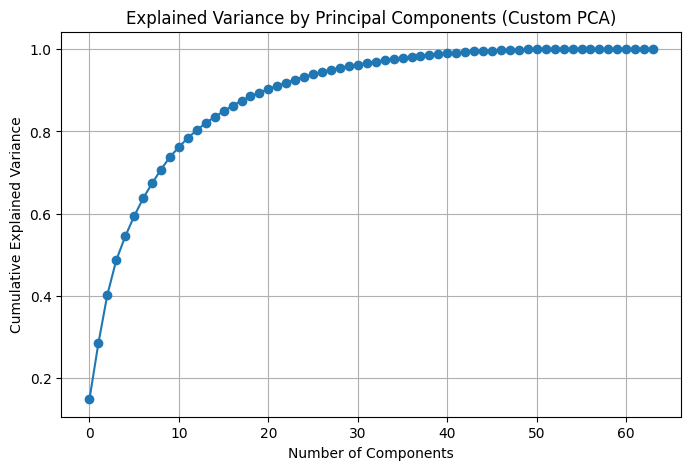

In [19]:
### fill here ###
digits = load_digits()
X = digits.data
y = digits.target

pca_custom_2d = PCA(X, n_components=2)
pca_custom_2d.fit()
X_pca_2d = pca_custom_2d.transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y)
plt.colorbar(scatter, label="Class Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Data (Custom PCA)")
plt.show()


#2d PCA transformation
pca_custom_2d = PCA(X, n_components=2)
pca_custom_2d.fit()
X_pca_2d = pca_custom_2d.transform(X)

#custom KNN model
knn_custom_2d = KNN(X_pca_2d, y, k=3)

#generating a mesh grid for visualization
x_min, x_max = X_pca_2d[:, 0].min() - 1, X_pca_2d[:, 0].max() + 1
y_min, y_max = X_pca_2d[:, 1].min() - 1, X_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_custom_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plotting decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Decision Boundary on 2D PCA Projection (Custom KNN)")
plt.show()


pca_custom = PCA(X, n_components=X.shape[1])  #fitting PCA to full number of components
pca_custom.fit()
explained_variance = pca_custom.explained_variance

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components (Custom PCA)")
plt.grid(True)
plt.show()

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [7]:
#loading Digits dataset

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#validating GNB
gnb = GNB(X_train, y_train)
gnb.fit()
y_pred_custom_gnb = gnb.predict(X_test)
accuracy_custom_gnb, f1_score_custom_gnb = accuracyNf1_score(y_test, y_pred_custom_gnb)

gnb_sklearn = GaussianNB()
gnb_sklearn.fit(X_train, y_train)
y_pred_sklearn_gnb = gnb_sklearn.predict(X_test)
accuracy_custom_gnb_sklearn, _ = accuracyNf1_score(y_test, y_pred_sklearn_gnb)

print("Custom GNB Accuracy:", accuracy_custom_gnb)
print("Sklearn GNB Accuracy:", accuracy_custom_gnb_sklearn)

#validating KNN
knn = KNN(X_train, y_train, k = 3)
y_pred_custom_knn = knn.predict(X_test)
accuracy_custom_knn, f1_score_custom_knn = accuracyNf1_score(y_test, y_pred_custom_knn)

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn_knn = knn_sklearn.predict(X_test)
accuracy_custom_knn_sklearn, _ = accuracyNf1_score(y_test, y_pred_sklearn_knn)

print("Custom KNN Accuracy:", accuracy_custom_knn)
print("Sklearn KNN Accuracy:", accuracy_custom_knn_sklearn)

#validating PCA
pca_custom = PCA(X_train, n_components = 3)
pca_custom.fit()
X_train_custom_pca = pca_custom.transform(X_train)

pca_sklearn = sklearnPCA(n_components = 3)
X_train_sklearn_pca = pca_sklearn.fit_transform(X_train)

print("Custom PCA Transformed X_train (first few rows):", X_train_custom_pca[:5])
print("Sklearn PCA Transformed X_train (first few rows):", X_train_sklearn_pca[:5])

#validating metrics defined above for further clarification
accuracy_custom, f1_custom = accuracyNf1_score(y_test, y_pred_custom_gnb)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn_gnb)
f1_sklearn = f1_score(y_test, y_pred_sklearn_gnb, average = 'weighted')

print(f"Custom Accuracy: {accuracy_custom}, Sklearn Accuracy: {accuracy_sklearn}")
print(f"Custom F1 Score: {f1_custom}, Sklearn F1 Score: {f1_sklearn}")

Custom GNB Accuracy: 0.8638888888888889
Sklearn GNB Accuracy: 0.8472222222222222
Custom KNN Accuracy: 0.9833333333333333
Sklearn KNN Accuracy: 0.9833333333333333
Custom PCA Transformed X_train (first few rows): [[ 16.46829973 -19.39248984 -15.45380052]
 [ -3.06605745 -22.37526104   3.00576267]
 [ 13.1343908  -20.35428767  10.73876463]
 [-22.61974867   5.52861584   5.22050867]
 [ -2.00376774 -23.61726568   0.39070213]]
Sklearn PCA Transformed X_train (first few rows): [[ 16.46829973 -19.39248984 -15.45380052]
 [ -3.06605745 -22.37526104   3.00576267]
 [ 13.1343908  -20.35428767  10.73876463]
 [-22.61974867   5.52861584   5.22050867]
 [ -2.00376774 -23.61726568   0.39070213]]
Custom Accuracy: 0.8638888888888889, Sklearn Accuracy: 0.8472222222222222
Custom F1 Score: 0.8594934929002811, Sklearn F1 Score: 0.8489770318561582


# Experiments (45 points)

Use Sklearn classes

---

Dataset preparation

In [15]:
#loading dataset and split to train and test set
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=454)

#calculating the frequency of each class in the training set
unique_classes_test, class_counts_test = np.unique(y_test, return_counts=True)
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)

for cls_train, count_train, cls_test, count_test in zip(unique_classes_train, class_counts_train, unique_classes_test, class_counts_test):
  print(f"Class {cls_train}: {count_train} train  {count_test} test {count_train/count_test} ratio")

Class 0: 144 train  34 test 4.235294117647059 ratio
Class 1: 137 train  45 test 3.0444444444444443 ratio
Class 2: 150 train  27 test 5.555555555555555 ratio
Class 3: 145 train  38 test 3.8157894736842106 ratio
Class 4: 145 train  36 test 4.027777777777778 ratio
Class 5: 144 train  38 test 3.789473684210526 ratio
Class 6: 146 train  35 test 4.171428571428572 ratio
Class 7: 142 train  37 test 3.8378378378378377 ratio
Class 8: 143 train  31 test 4.612903225806452 ratio
Class 9: 141 train  39 test 3.6153846153846154 ratio


Apply classification methods using the dataset directly (10 points)
(paramtre denemeleri tarzı şeyler)

In [9]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
  knn = KNN(X_train, y_train, k = k)
  y_pred_custom_knn = knn.predict(X_test)
  accuracy_custom_knn, f1_score_custom_knn = accuracyNf1_score(y_test, y_pred_custom_knn)
  print(f"Custom KNN Accuracy for k={k}: {accuracy_custom_knn} | F1 Score: {f1_score_custom_knn}")

Custom KNN Accuracy for k=1: 0.9694444444444444 | F1 Score: 0.970082804593701
Custom KNN Accuracy for k=3: 0.9777777777777777 | F1 Score: 0.9789098757244441
Custom KNN Accuracy for k=5: 0.9722222222222222 | F1 Score: 0.9728755967783508
Custom KNN Accuracy for k=7: 0.9694444444444444 | F1 Score: 0.9702791055502805
Custom KNN Accuracy for k=9: 0.9722222222222222 | F1 Score: 0.9729448608476148


In [10]:
gnb = GNB(X_train, y_train)
gnb.fit()
y_pred_custom_gnb = gnb.predict(X_test)
accuracy_custom_gnb, f1_score_custom_gnb = accuracyNf1_score(y_test, y_pred_custom_gnb)
print(f"Custom GNB Accuracy: {accuracy_custom_gnb} | F1 Score: {f1_score_custom_gnb}")

Custom GNB Accuracy: 0.8777777777777778 | F1 Score: 0.8777011286879997


Apply PCA and find optimal #components with the best recontruction (RMSE) as the objective (10 points)

Components: 1, RMSE: 3.9972
Components: 2, RMSE: 3.6635
Components: 3, RMSE: 3.3477
Components: 4, RMSE: 3.1029
Components: 5, RMSE: 2.9227
Components: 6, RMSE: 2.7603
Components: 7, RMSE: 2.6094
Components: 8, RMSE: 2.4742
Components: 9, RMSE: 2.3436
Components: 10, RMSE: 2.2168
Components: 11, RMSE: 2.1140
Components: 12, RMSE: 2.0105
Components: 13, RMSE: 1.9236
Components: 14, RMSE: 1.8350
Components: 15, RMSE: 1.7584
Components: 16, RMSE: 1.6814
Components: 17, RMSE: 1.6061
Components: 18, RMSE: 1.5314
Components: 19, RMSE: 1.4677
Components: 20, RMSE: 1.4086
Components: 21, RMSE: 1.3481
Components: 22, RMSE: 1.2914
Components: 23, RMSE: 1.2343
Components: 24, RMSE: 1.1781
Components: 25, RMSE: 1.1212
Components: 26, RMSE: 1.0702
Components: 27, RMSE: 1.0184
Components: 28, RMSE: 0.9698
Components: 29, RMSE: 0.9212
Components: 30, RMSE: 0.8764
Components: 31, RMSE: 0.8354
Components: 32, RMSE: 0.7948
Components: 33, RMSE: 0.7539
Components: 34, RMSE: 0.7119
Components: 35, RMSE: 0

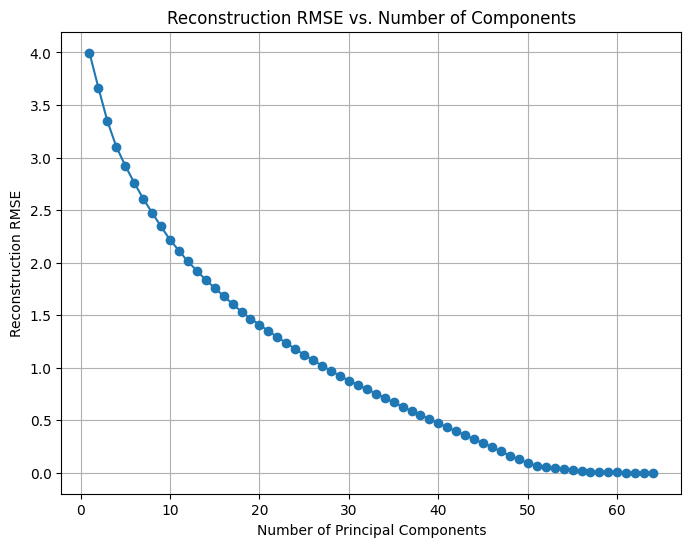

In [11]:
def rec_rmse(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    rmse = np.sqrt(mse)
    return rmse

n_components_range = range(1, X.shape[1] + 1)
rmse_values = []

for n_components in n_components_range:
    pca = sklearnPCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)

    cur_rmse = rec_rmse(X, X_reconstructed)
    rmse_values.append(cur_rmse)
    print(f"Components: {n_components}, RMSE: {cur_rmse:.4f}")

#finding optimal components with lowest RMSE
optimal_components = n_components_range[np.argmin(rmse_values)]
print(f"\nOptimal number of components: {optimal_components} with RMSE: {min(rmse_values):.4f}")

#plotting RMSE vs number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, rmse_values, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction RMSE')
plt.title('Reconstruction RMSE vs. Number of Components')
plt.grid(True)
plt.show()

Apply PCA class-wise and merge the transformed features (10 points)

In [14]:
unique_classes = np.unique(y)
n_components = 10
transformed_data = []
for cls in unique_classes:
    X_class = X[y == cls]
    pca = PCA(X, n_components = n_components)
    pca.fit()
    X_class_pca = pca.transform(X_class)
    transformed_data.append(pd.DataFrame(X_class_pca, columns=[f'PC_{i+1}_class_{cls}' for i in range(n_components)]))

#merging transformed features
merged_transformed_data = pd.concat(transformed_data, axis=1)

print("Merged Transformed Data Shape:", merged_transformed_data.shape)
print(merged_transformed_data.head())

Merged Transformed Data Shape: (183, 100)
   PC_1_class_0  PC_2_class_0  PC_3_class_0  PC_4_class_0  PC_5_class_0  \
0     -1.259466    -21.274883      9.463055     13.014189      7.128823   
1     11.215079    -16.919862     10.066849      9.747088      5.673415   
2      6.435364    -19.477106     10.203479      6.817177     11.128670   
3      0.240928    -26.593014      8.579714     16.134506      4.498237   
4      6.134364    -15.899977      8.229520     12.255680      7.486848   

   PC_6_class_0  PC_7_class_0  PC_8_class_0  PC_9_class_0  PC_10_class_0  ...  \
0      7.440659      3.252837      2.553470     -0.581842       3.625697  ...   
1      8.104378     -3.342633     -7.120773      0.375276       6.542028  ...   
2      8.456769      0.097204     -4.129091      3.055680      -2.834407  ...   
3     10.035108     -1.828020      4.965205     -7.297032      -0.696581  ...   
4     13.792216     -0.614003      0.326457      0.068490      -3.152073  ...   

   PC_1_class_9  PC_

Apply classification methods on the transformed features (PCA outputs) both nomral and class-wise (15 points)
(normal PCA dimension 30, class-wise PCA dimension 3x10)

In [18]:
### fill here ###
digits = load_digits()
X = digits.data
y = digits.target

n_components_normal = 30
normal_pca = PCA(X, n_components=n_components_normal)
normal_pca.fit()
X_normal_pca = normal_pca.transform(X)

X_train_normal, X_test_normal, y_train, y_test = train_test_split(X_normal_pca, y, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train_normal, y_train)
y_pred_normal = clf.predict(X_test_normal)
accuracy_normal, _ = accuracyNf1_score(y_test, y_pred_normal)
print("Accuracy on Normal PCA transformed data:", accuracy_normal)

#applying Class-wise PCA with 10 components for each class

unique_classes = np.unique(y)
n_components_classwise = 10
X_classwise_pca = np.zeros((X.shape[0], len(unique_classes) * n_components_classwise))  # Empty array to store results

#performing PCA on each class separately as done above, the same structure and snipped, just ctrl c + v
for i, cls in enumerate(unique_classes):
    X_class = X[y == cls]
    class_pca = PCA(X_class, n_components=n_components_classwise)
    class_pca.fit()
    X_class_pca = class_pca.transform(X_class)
    X_classwise_pca[y == cls, i * n_components_classwise:(i + 1) * n_components_classwise] = X_class_pca


#spliting the class-wise PCA-transformed data for training and testing
X_train_classwise, X_test_classwise, y_train, y_test = train_test_split(X_classwise_pca, y, test_size=0.3, random_state=42)

#training the same classifier on the class-wise PCA data
clf.fit(X_train_classwise, y_train)
y_pred_classwise = clf.predict(X_test_classwise)
accuracy_classwise, _ = accuracyNf1_score(y_test, y_pred_classwise)
print("Accuracy on Class-wise PCA transformed data:", accuracy_classwise)

Accuracy on Normal PCA transformed data: 0.9648148148148148
Accuracy on Class-wise PCA transformed data: 0.37222222222222223
